In [1]:
import os
from pathlib import Path
from dotenv import find_dotenv

os.chdir(Path(find_dotenv()).parent)
print(Path.cwd().stem)

take_home_assignment


# Introduction

Basic EDA (exploratory data analysis).

# Summary

TODO: Brief summary of EDA

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare


from src.dataloader import XES3G5MDataModule, XES3G5MDataModuleConfig

---

# Load Data

In [3]:
data_module = XES3G5MDataModule(config=XES3G5MDataModuleConfig)
data_module.prepare_data()

In [4]:
stage = "fit"
data_module.setup(stage=stage)
data_module.seq_df_train

,fold,uid,questions,concepts,responses,timestamps,selectmasks,is_repeat
0,0,11066,"[3751, 3752, 3753, 3754, 1990, 3739, 3740, 374...","[187, 187, 374, 187, 374, 188, 188, 228, 166, ...","[1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, ...","[1595229836000, 1595233013000, 1595233687000, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1,0,11066,"[95, 4294, 4294, 4300, 4300, 4301, 4302, 4308,...","[63, 64, 102, 659, 376, 147, 147, 65, 64, 78, ...","[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, ...","[1608890160000, 1608892236000, 1608892236000, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,0,14482,"[266, 268, 2203, 870, 2316, 2587, 2323, 2588, ...","[9, 139, 140, 9, 496, 232, 231, 231, 146, 145,...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1595896054000, 1595896054000, 1595896054000, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ..."
3,0,14482,"[1280, 1046, 405, 404, 404, 4623, 4622, 4622, ...","[257, 32, 204, 204, 205, 206, 526, 206, 206, 2...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, ...","[1614471945000, 1614471945000, 1614471945000, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,0,10532,"[268, 266, 2203, 2588, 2587, 2323, 275, 811, 2...","[139, 9, 140, 231, 232, 231, 30, 30, 62, 65, 6...","[1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...","[1595918717000, 1595918717000, 1595918717000, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...
26707,3,3949,"[2500, 2502, 2501, 2501, 2788, 3368, 3370, 336...","[335, 335, 187, 374, 81, 81, 336, 339, 336, 46...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1607668529000, 1607668529000, 1607668529000, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, ..."
26708,3,13641,"[2208, 2333, 2334, 792, 791, 291, 293, 1946, 2...","[155, 155, 155, 303, 155, 55, 155, 155, 155, 1...","[0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1599300685000, 1599386011000, 1599386113000, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
26709,3,13641,"[1316, 1316, 2273, 2273, 1317, 1317, 1318, 131...","[390, 220, 220, 73, 24, 73, 66, 11, 17, 326, 7...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1618728912000, 1618728912000, 1618728912000, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, ..."
26710,3,16217,"[308, 1950, 1950, 2598, 819, 819, 181, 182, 22...","[160, 307, 55, 55, 307, 55, 108, 109, 109, 108...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...","[1602075398000, 1602075705000, 1602075705000, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


❗ Long user sequences (> 200) are split into multiple rows, which are then treated as an independent data point. This means that the learning sequence is arbitrarily truncated (at 200), subsequent segments for the same user are treated as starting from scratch, hence introducing bias in the model.

Mitigation

* sliding window
* add positional encoding
* feature engineering / transfer information across segments
* increase max sequence length

In [23]:
data_module.seq_df_train.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            26702, 26703, 26704, 26705, 26706, 26707, 26708, 26709, 26710,
            26711],
           dtype='int64', length=26712)

In [12]:
stage = "test"
data_module.setup(stage=stage)
test_dataloader = data_module.test_dataloader()

A user ID appears in multiple rows.

In [33]:
data_module.seq_df_train["uid"].value_counts()

8854     6
300      5
7460     4
9616     4
240      4
        ..
6882     2
15870    2
10636    2
4427     2
16217    2
Name: uid, Length: 11563, dtype: int64

In [34]:
data_module.seq_df_train.query("uid == 8854")

,fold,uid,questions,concepts,responses,timestamps,selectmasks,is_repeat
11448,1,8854,"[1859, 1864, 1865, 1863, 1860, 1862, 1861, 184...","[214, 213, 155, 228, 155, 306, 155, 155, 5, 21...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[1593350024000, 1593350024000, 1593350024000, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
11449,1,8854,"[1593, 1593, 1592, 1592, 1594, 1595, 1591, 159...","[35, 73, 252, 73, 32, 33, 33, 73, 11, 165, 10,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1601088298000, 1601088298000, 1601088298000, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, ..."
11450,1,8854,"[1608, 1610, 1615, 1607, 1688, 1686, 1689, 168...","[420, 257, 257, 405, 431, 431, 83, 86, 86, 261...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1605589169000, 1605589169000, 1605589169000, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11451,1,8854,"[1757, 1760, 1759, 1761, 94, 1925, 4563, 4560,...","[272, 65, 62, 64, 62, 62, 65, 65, 65, 679, 147...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1608906987000, 1608906987000, 1608906987000, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11452,1,8854,"[1822, 1822, 1816, 1817, 1815, 1815, 1818, 181...","[449, 455, 450, 167, 336, 100, 450, 61, 69, 22...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[1612097632000, 1612097632000, 1612097987000, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
11453,1,8854,"[246, 248, 257, 1520, 2192, 2193, 2191, 250, 2...","[133, 135, 99, 99, 132, 104, 133, 131, 137, 10...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1620393727000, 1620394354000, 1620394354000, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


---

# Number of interactions

These are greater than the number reported in the paper (5,549,635).

In [ ]:
print(len(data_module.seq_df_train.questions.explode().loc[lambda s: s != -1]))
print(len(data_module.seq_df_val.questions.explode().loc[lambda s: s != -1]))
print(len(data_module.seq_df_test.questions.explode().loc[lambda s: s != -1]))

4111424
1027620
1274309


---

# Number of unique IDs

Used for the indexes of the nn.Embedding layers.

In [23]:
splits = ["train", "val", "test"]
columns = ["questions", "concepts", "uid"]
for col in columns:
    col_set = set()
    for split in splits:
        col_set |= set(getattr(data_module, f"seq_df_{split}")[col].explode().unique())
    print(f"Number of unique {col}: {len(col_set)}")

Number of unique questions: 7653
Number of unique concepts: 866
Number of unique uid: 18066


---

# Grouping of `uid`

Check if all the same `uid`s are grouped together, or if they're spread out. This has implications on the splitting of a `uid` group into more rows.

In [38]:
def uids_grouped(uids):
    """
    Check if all same UIDs are adjacent to each other.
    
    Args:
        uids: Series or array of UIDs
        
    Returns:
        bool: True if all same UIDs are grouped together
    """
    # Count how many times the UID changes
    transitions = sum(uids[i] != uids[i-1] for i in range(1, len(uids)))
    
    # Count unique UIDs
    unique_uids = len(set(uids))
    
    # If all same UIDs are adjacent, transitions should equal unique_uids - 1
    # (or 0 if there's only one unique UID)
    return transitions == max(0, unique_uids - 1)

In [40]:
print(uids_grouped(data_module.seq_df_train["uid"].values))

True


---

# Dataset Sizes

In [22]:
len(data_module.seq_df_train)

26712

In [24]:
len(data_module.seq_df_val)

6685

In [27]:
len(data_module.seq_df_test)

3613

---

# Sequences Greater than 200

All users have sequences greater than 200.

In [36]:
data_module.seq_df_train.groupby("uid")["uid"].count().value_counts()

2    8254
3    3035
4     272
5       1
6       1
Name: uid, dtype: int64

---

# Distributions Across Splits

* TODO: Distributions of target across splits
* TODO: Distributions of question IDs across splits
* TODO: Distributions of `responses` per position and across splits


## Users

In [ ]:
assert len(set(data_module.seq_df_train.uid.unique()).intersection(data_module.seq_df_val.uid.unique())) == 0, "Train and validation sets should not overlap in user IDs"
assert len(set(data_module.seq_df_train.uid.unique()).intersection(data_module.seq_df_test.uid.unique())) == 0, "Train and test sets should not overlap in user IDs"
assert len(set(data_module.seq_df_test.uid.unique()).intersection(data_module.seq_df_val.uid.unique())) == 0, "Test and validation sets should not overlap in user IDs"

## Answer Success Rate by Position

There is an upward trend of success rate as the question position increases, i.e. as students do more questions, the proportion of correct answers also increases. This means that treatment of sequences at positions 201 to 400, 401 to 600, etc need to be handled carefully otherwise they could introduce bias if they are treated as the start of a the sequence.

At least  the trend seems to be consistent across the training and validation splits.

In [75]:
def plot_proportion_trend(df: pd.DataFrame, split: str) -> None:
    responses_df = df["responses"].apply(pd.Series).replace(to_replace=-1, value=np.nan)
    responses_df.describe().T["mean"].plot(kind="line")
    plt.title(f"Proportion of correct answers per position ({split})")
    plt.xlabel("Position")
    plt.ylabel("Proportion of correct answers")
    plt.show()

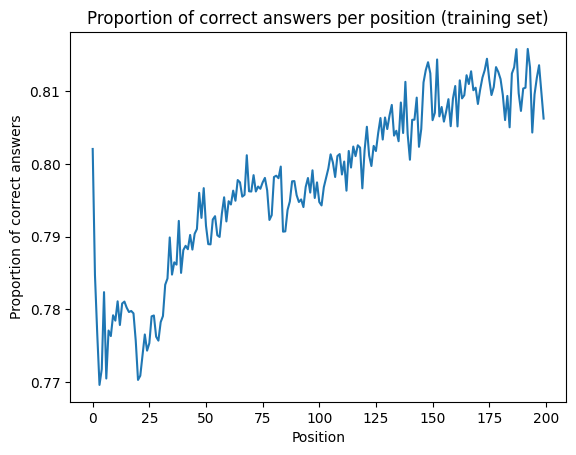

In [77]:
plot_proportion_trend(data_module.seq_df_train, "training set")

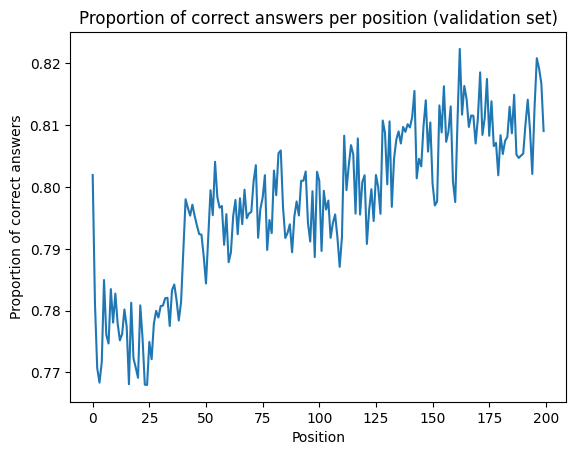

In [78]:
plot_proportion_trend(data_module.seq_df_val, "validation set")

## Distribution of Questions

In [96]:
plot_train_df = data_module.seq_df_train.questions.explode().loc[lambda s: s != -1].to_frame()
plot_train_df

,questions
0,3751
0,3752
0,3753
0,3754
0,1990
...,...
26711,2416
26711,2673
26711,2673
26711,2673


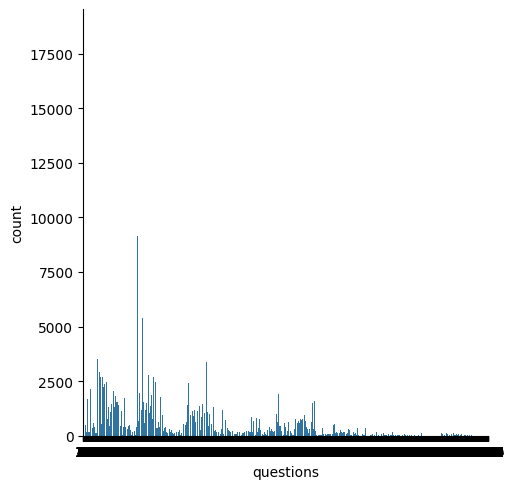

In [ ]:
plot_train_df = data_module.seq_df_train.questions.explode().loc[lambda s: s != -1].to_frame()
fig = sns.catplot(
    kind="count",
    data=plot_train_df,
    x="questions",
    )
fig.set_axis_labels("Question ID", "Count")
fig.set_titles("Distribution of questions in training set")
plt.show()

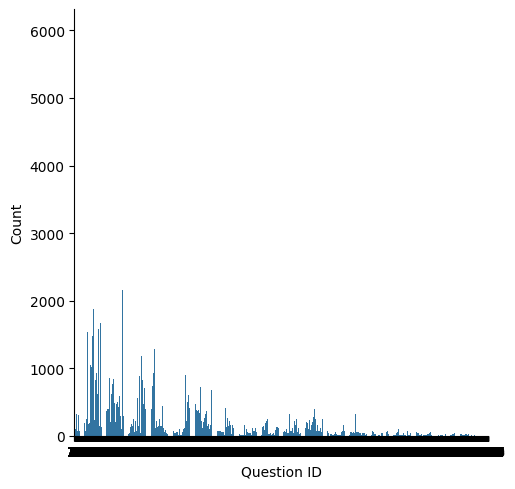

In [99]:
plot_test_df = data_module.seq_df_test.questions.explode().loc[lambda s: s != -1].to_frame()
fig = sns.catplot(
    kind="count",
    data=plot_test_df,
    x="questions",
    )
fig.set_axis_labels("Question ID", "Count")
fig.set_titles("Distribution of questions in the test set")
plt.show()

In [101]:
plot_train_df

,questions
0,3751
0,3752
0,3753
0,3754
0,1990
...,...
26711,2416
26711,2673
26711,2673
26711,2673


In [ ]:
train_counts = 

In [ ]:
stat, p = chisquare(f_obs=train_counts, f_exp=other_counts + 1e-8)
print(f"Chi-squared statistic: {stat:.2f}, p-value: {p:.4f}")

In [100]:
chisquare??

Signature: chisquare(f_obs, f_exp=None, ddof=0, axis=0, *, sum_check=True)
Source:   
def chisquare(f_obs, f_exp=None, ddof=0, axis=0, *, sum_check=True):
    """Perform Pearson's chi-squared test.

    Pearson's chi-squared test [1]_ is a goodness-of-fit test for a multinomial
    distribution with given probabilities; that is, it assesses the null hypothesis
    that the observed frequencies (counts) are obtained by independent
    sampling of *N* observations from a categorical distribution with given
    expected frequencies.

    Parameters
    ----------
    f_obs : array_like
        Observed frequencies in each category.
    f_exp : array_like, optional
        Expected frequencies in each category. By default, the categories are
        assumed to be equally likely.
    ddof : int, optional
        "Delta degrees of freedom": adjustment to the degrees of freedom
        for the p-value.  The p-value is computed using a chi-squared
        distribution with ``k - 1 - ddof`` deg

---

# Timestamps

## Monotonicity in a row

In [51]:
def is_non_decreasing(seq):
    return all(seq[i] <= seq[i+1] for i in range(len(seq) - 1))

def apply_selectmasks(row: pd.Series) -> list[int]:
    """Applies the `selectmasks` to the `timestamps`

    Args:
        row (pd.Series): The row of the dataframe containing the columns `timestamps` and `selectmasks`

    Returns:
        list[int]: A potentially truncated list of `timestamps`
    """
    return [ts for ts, sm in zip(row["timestamps"], row["selectmasks"]) if sm == 1]

In [ ]:
split = "train"
assert len(
    getattr(data_module, f"seq_df_{split}")
    .assign(is_non_decreasing_timestamps = lambda df: df.apply(apply_selectmasks, axis="columns").apply(is_non_decreasing))
    .query("~is_non_decreasing_timestamps")
) == 0, "There are some decreasing timestamps in a row"

In [56]:
split = "val"
assert len(
    getattr(data_module, f"seq_df_{split}")
    .assign(is_non_decreasing_timestamps = lambda df: df.apply(apply_selectmasks, axis="columns").apply(is_non_decreasing))
    .query("~is_non_decreasing_timestamps")
) == 0, "There are some decreasing timestamps in a row"

In [57]:
split = "test"
assert len(
    getattr(data_module, f"seq_df_{split}")
    .assign(is_non_decreasing_timestamps = lambda df: df.apply(apply_selectmasks, axis="columns").apply(is_non_decreasing))
    .query("~is_non_decreasing_timestamps")
) == 0, "There are some decreasing timestamps in a row"

## Monotonicity across rows

In [69]:
def non_decreasing_within_a_group(df: pd.DataFrame) -> bool:
    """Users with a sequence larger than 200 are split into multiple rows.
    Check that the last value in the `timestamps` list is less than or equal to the 
    the first value in the `timestamps` list in the next row.

    Args:
        df (pd.DataFrame): The dataframe containing the columns `timestamps` and `selectmasks`

    Returns:
        bool: True if all rows agree to the logic.
    """
    timestamps = df["timestamps"].tolist()
    comparisons = []
    for i, seq in enumerate(timestamps[:-1]):
        comparisons.append(seq[-1] <= timestamps[i+1][0])
    return all(comparisons)

In [71]:
split = "train"
assert all(
    getattr(data_module, f"seq_df_{split}")
    .groupby("uid")
    .apply(non_decreasing_within_a_group)
), f"Some users in the {split} split are not sorted."

In [72]:
split = "val"
assert all(
    getattr(data_module, f"seq_df_{split}")
    .groupby("uid")
    .apply(non_decreasing_within_a_group)
), f"Some users in the {split} split are not sorted."

In [73]:
split = "test"
assert all(
    getattr(data_module, f"seq_df_{split}")
    .groupby("uid")
    .apply(non_decreasing_within_a_group)
), f"Some users in the {split} split are not sorted."

---

# Embeddings

❗ The `concept_embeddings` cardinality doesn't match the number of unique `concepts`.

## Embedding Dimensions

In [58]:
print(data_module.question_embeddings.shape)
print(data_module.concept_embeddings.shape)

(7652, 768)
(1175, 768)


---

# Correctness Distribution On the First Segment vs Subsequent Segments

To test if arbitrarily splitting the sequence into chunks of 200 could introduce bias, check if the proportions of correct answers for questions in the first segment differs from those in the subsequent segments. For example, if question 4294 answered in segment 1 (within sequence 1-200) has a probability of being correct of 50%, and in segment 2 (within sequence 201-400) has a probability of being correct of 80%, this likely means that the student has learned to generalise the knowledge gained in the first segment, hence they were able to answer 4294 with a high probability of success. If this is the case, then treating subsequent segments as if they are independent (i.e. not having any history) would introduct bias to the model.

---

# OOV (Out Of Vocabulary) IDs

## Question IDs

In [14]:
len(set(data_module.seq_df_val.questions.explode().unique()) - set(data_module.seq_df_train.questions.explode().unique()))

101

In [15]:
len(set(data_module.seq_df_test.questions.explode().unique()) - set(data_module.seq_df_train.questions.explode().unique()))

47

## Knowledge Component IDs

---

# Appendix - Question-Level vs KC-Level

In [ ]:
# Question level data
n_rows = 1000
q_level_df = pd.read_csv("data/XES3G5M/question_level/train_valid_sequences_quelevel.csv", nrows=n_rows)
q_level_df


,fold,uid,questions,concepts,responses,timestamps,selectmasks
0,0,11066,"3751,3752,3753,3754,1990,3739,3740,3742,3756,3...","187,187,374,187,374,188,188,228,166_170,221,40...","1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,...","1595229836000,1595233013000,1595233687000,1595...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
1,0,11066,"1927,2125,2127,2128,2130,2129,2131,2136,2134,2...","468,78,78,78,78,78,78,378,378,378,82,78,78,64_...","1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,...","1611827809000,1611829702000,1611832165000,1611...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
2,0,14482,"266,268,2203,870,2316,2587,2323,2588,5194,868,...","9,139,140,9,496,232,231,231,146,145_231,31,65,...","0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,...","1595896054000,1595896054000,1595896054000,1595...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
3,0,14482,"4929,1073,424,1074,439,1079,1078,440,1318,4931...","214,214,214,214,24,23,23,220,66_11_17_326,359,...","1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,0,0,0,0,0,...","1616289797000,1616300013000,1616300013000,1616...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
4,0,10532,"268,266,2203,2588,2587,2323,275,811,2205,277,2...","139,9,140,231,232,231,30,30,62_65,62,65,152,15...","1,0,0,0,1,0,1,1,1,1,0,1,0,1,0,0,0,1,1,1,0,1,0,...","1595918717000,1595918717000,1595918717000,1596...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
...,...,...,...,...,...,...,...
995,0,17005,"2312,12,1129,1131,1130,267,2314,266,2309,863,8...","139_9,9,365,66_365,366,141,139,9,365,142,223,1...","1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1,1,1,1,...","1594526920000,1594526920000,1594563373000,1594...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
996,0,17005,"1317,1316,442,2392,429,1336,1100,1102,1101,109...","24_73,390_220,140,502,213_217,238_180,180,176,...","0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,...","1618036139000,1618036139000,1618641549000,1618...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
997,0,6010,"2323,2322,274,273,275,812,811,278,277,276,290,...","231,232,119,146,30,30,30,147,62,65,54,470,51,1...","1,0,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,1,1,1,1,1,1,...","1596414359000,1596414359000,1596500722000,1596...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
998,0,6010,"1276,1270,1053,2365,2366,403,404,405,405,404,4...","257,257,252,257,257,204,204_205,204,204,204_20...","1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,...","1612868724000,1612868724000,1612868816000,1612...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."


In [56]:
q_long_df = pd.DataFrame(
    q_level_df
    .query("uid == 11066")
    .drop(columns=["fold", "uid"])
    .iloc[0]
    .apply(lambda x: x.split(","))
    .tolist(),
    index=["questions", "concepts", "responses", "timestamps", "selectmasks"]
).T

q_long_df

,questions,concepts,responses,timestamps,selectmasks
0,3751,187,1,1595229836000,1
1,3752,187,1,1595233013000,1
2,3753,374,1,1595233687000,1
3,3754,187,0,1595236010000,1
4,1990,374,1,1595314541000,1
...,...,...,...,...,...
195,4302,147,0,1608896293000,1
196,4308,65,0,1608899418000,1
197,115,64,1,1609315433000,1
198,130,78,1,1611826578000,1


In [21]:
# KC level data
kc_level_df = pd.read_csv("data/XES3G5M/kc_level/train_valid_sequences.csv", nrows=n_rows)
kc_level_df

,fold,uid,questions,concepts,responses,timestamps,selectmasks,is_repeat
0,0,11066,"3751,3752,3753,3754,1990,3739,3740,3742,3756,3...","187,187,374,187,374,188,188,228,166,170,221,40...","1,1,1,0,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,...","1595229836000,1595233013000,1595233687000,1595...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
1,0,11066,"95,4294,4294,4300,4300,4301,4302,4308,115,130,...","63,64,102,659,376,147,147,65,64,78,81,468,78,7...","0,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,0,0,0,1,...","1608890160000,1608892236000,1608892236000,1608...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
2,0,14482,"266,268,2203,870,2316,2587,2323,2588,5194,868,...","9,139,140,9,496,232,231,231,146,145,231,31,65,...","0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,...","1595896054000,1595896054000,1595896054000,1595...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,..."
3,0,14482,"1280,1046,405,404,404,4623,4622,4622,4624,4954...","257,32,204,204,205,206,526,206,206,206,206,207...","0,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,0,0,1,1,1,1,...","1614471945000,1614471945000,1614471945000,1614...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
4,0,10532,"268,266,2203,2588,2587,2323,275,811,2205,2205,...","139,9,140,231,232,231,30,30,62,65,62,65,152,15...","1,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,0,1,1,1,0,1,...","1595918717000,1595918717000,1595918717000,1596...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
...,...,...,...,...,...,...,...,...
995,0,5709,"1129,1131,1131,1130,263,264,265,267,268,266,11...","365,66,365,366,139,9,140,141,139,9,142,494,301...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,...","1594428907000,1594428907000,1594428907000,1594...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,..."
996,0,5709,"403,404,404,405,2367,2380,2381,413,412,415,416...","204,204,205,204,501,138,300,138,138,209,138,20...","1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,...","1614992125000,1614992125000,1614992125000,1614...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,..."
997,0,6917,"1991,1992,2003,2001,2004,2002,467,467,467,2012...","213,214,229,229,229,229,233,234,235,233,234,23...","1,0,0,1,0,0,1,1,1,0,0,0,1,1,1,1,1,0,1,0,1,1,1,...","1596508399000,1596508777000,1596675389000,1596...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,..."
998,0,6917,"650,651,2120,653,653,2122,2122,654,655,656,657...","102,147,147,272,147,272,147,65,65,65,65,86,447...","1,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,...","1608947653000,1608948858000,1608949075000,1608...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,..."


In [50]:
long_df = pd.DataFrame(
    kc_level_df
    .query("uid == 11066")
    .drop(columns=["fold", "uid"])
    .iloc[0]
    .apply(lambda x: x.split(","))
    .tolist(),
    index=["questions", "concepts", "responses", "timestamps", "selectmasks", "is_repeat"]
).T

long_df

,questions,concepts,responses,timestamps,selectmasks,is_repeat
0,3751,187,1,1595229836000,1,0
1,3752,187,1,1595233013000,1,0
2,3753,374,1,1595233687000,1,0
3,3754,187,0,1595236010000,1,0
4,1990,374,1,1595314541000,1,0
...,...,...,...,...,...,...
195,4076,57,0,1607689417000,1,0
196,3597,55,1,1607765000000,1,0
197,3092,46,1,1607765147000,1,0
198,97,56,1,1608890160000,1,0


In [54]:
(
    long_df
    .assign(dup_questions = lambda df: df["questions"].duplicated(keep=False))
)

,questions,concepts,responses,timestamps,selectmasks,is_repeat,dup_questions
0,3751,187,1,1595229836000,1,0,False
1,3752,187,1,1595233013000,1,0,False
2,3753,374,1,1595233687000,1,0,False
3,3754,187,0,1595236010000,1,0,False
4,1990,374,1,1595314541000,1,0,False
...,...,...,...,...,...,...,...
195,4076,57,0,1607689417000,1,0,False
196,3597,55,1,1607765000000,1,0,False
197,3092,46,1,1607765147000,1,0,False
198,97,56,1,1608890160000,1,0,False


---

# Check if question_ids are zero-based

Yes, there are 0-valued question indexes. Note the -1 is for padding. This means that the padding can't be changed to 0.

In [41]:
sorted(data_module.seq_df_train.questions.explode().unique().tolist())

[-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 

# DELETE

In [ ]:
print(len(data_module.seq_df_train.questions.explode().loc[lambda s: s != -1]))
print(len(data_module.seq_df_val.questions.explode().loc[lambda s: s != -1]))
print(len(data_module.seq_df_test.questions.explode().loc[lambda s: s != -1]))


4111424
1027620
1274309


In [ ]:
(
    len(data_module.seq_df_train.questions.explode().loc[lambda s: s != -1]) +
    len(data_module.seq_df_val.questions.explode().loc[lambda s: s != -1])
)


5139044

In [108]:
(
    len(data_module.seq_df_train.questions.explode()) +
    len(data_module.seq_df_val.questions.explode())
)


6679400